# Responsi PDM

## Nama: Brikca Kristal Desfingka
## NIM: 23/512108/PA/21869

## **Library**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

# Untuk model & evaluasi
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Untuk Word Cloud
from wordcloud import WordCloud, STOPWORDS

# Agar grafik langsung tampil di notebook
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

## **Data**

In [33]:
# Read datasets
df1 = pd.read_csv(r"D:\Kuliah\Semester 4\PDM\Praktikum\Reponsi\Dataset Responsi (Train).csv")
df1.head()

,full_text,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end,NaN,NaN,NaN,NaN
1,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????,NaN,NaN,NaN,NaN
2,Hai #SobatSukses BSI Career Selamat &amp,sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp,Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN,NaN,NaN
3,Pengen cepet selesai kampus mengajar,NaN,NaN,NaN,NaN
4,kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp,uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!,NaN,NaN,NaN


In [34]:
# (1) Ambil daftar kolom “full_text” dan semua “Unnamed:” yang ada
all_text_cols = [col for col in df1.columns if col.startswith('full_text') or col.startswith('Unnamed:')]

print("Kolom yang digabung:", all_text_cols)

# (2) Gabungkan baris per baris: apabila NaN abaikan, sebaliknya gabungkan dengan spasi
def merge_text_columns(row):
    # Ambil semua nilai di kolom-kolom tersebut (full_text + Unnamed:1..n), ubah NaN→'' lalu gabung dengan spasi
    parts = [str(row[col]) for col in all_text_cols if pd.notna(row[col])]
    # Gabungkan, lalu strip whitespace berlebih
    merged = " ".join(parts).strip()
    return merged

# (3) Buat kolom baru 'tweet_full' yang sudah tergabung
df1['tweet_full'] = df1.apply(merge_text_columns, axis=1)

# (4) Periksa hasil beberapa baris pertama
df1.loc[:, all_text_cols + ['tweet_full']].head(5)


Kolom yang digabung: ['full_text', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


,full_text,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet_full
0,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end,NaN,NaN,NaN,NaN,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end
1,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????,NaN,NaN,NaN,NaN,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????
2,Hai #SobatSukses BSI Career Selamat &amp,sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp,Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN,NaN,NaN,Hai #SobatSukses BSI Career Selamat &amp sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN
3,Pengen cepet selesai kampus mengajar,NaN,NaN,NaN,NaN,Pengen cepet selesai kampus mengajar
4,kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp,uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!,NaN,NaN,NaN,kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!


In [35]:
import pandas as pd

# Misalkan df1 sudah berisi semua kolom termasuk 'tweet_full' dan juga kolom label (misal 'label_sentimen')
# (1) Lihat ukuran dataset
print("Jumlah baris × kolom:", df1.shape)

# (2) Jika ada kolom label, lihat distribusinya
if 'label_sentimen' in df1.columns:
    print("\nDistribusi label:")
    print(df1['label_sentimen'].value_counts(), "\n")

# (3) Cek missing value pada kolom tweet_full
print("Jumlah tweet_missing:", df1['tweet_full'].isna().sum())

# (4) Tampilkan 5 tweet pertama
print("\nContoh tweet mentah:")
print(df1['tweet_full'].head(5).tolist())


Jumlah baris × kolom: (5740, 6)
Jumlah tweet_missing: 0

Contoh tweet mentah:
['@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end', 'Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????', 'Hai #SobatSukses BSI Career Selamat &amp sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN', 'Pengen cepet selesai kampus mengajar', 'kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!']


Menggabungkan kalimat agar menjadi satu variabel dan tidak terpotong.

## **Text Cleaning**

In [36]:
def clean_text(text):
    # Ubah ke lowercase dan strip whitespace
    text = text.lower().strip()
    # Menghapus username (mis. @username)
    text = re.sub(r'@[^\s]+', '', text)
    # Menghapus kata 'rt'
    text = re.sub(r'\brt\b', '', text)
    # Menghapus URL (http, https, www)
    text = re.sub(r'((www\S+)|(http\S+))', ' ', text)
    # Menghapus angka
    text = re.sub(r'\d+', ' ', text)
    # Menghapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Menghapus tab, newline, backslash
    text = text.replace('\t', ' ').replace('\n', ' ').replace('\\', '')
    # Mengganti ellipsis dengan spasi
    text = re.sub(r'\.\.\.', ' ', text)
    # Menghapus punctuation kecuali tanda titik berulang
    text = re.sub(r'\.\.', '', text)
    # Mengganti titik dengan spasi
    text = re.sub(r'\.', ' ', text)
    # Menghapus extra whitespace
    text = ' '.join(text.split())
    # Menghapus pola " / "
    text = re.sub(r'( / )', '', text)
    # Menghapus "()"
    text = text.replace('()', '')
    # Menghapus hashtag (#kata)
    text = re.sub(r'#\w+', '', text)
    # Menghapus ";"
    text = text.replace(';', '')
    # Menghapus semua punctuation tersisa
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

In [37]:
# Terapkan pada dataset
df2_clean = df1.copy()
df2_clean.tweet_full = df2_clean.tweet_full.apply(clean_text)

# Sebelum dan sesudah cleaning
display(df1.head(), df2_clean.head())

,full_text,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet_full
0,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end,NaN,NaN,NaN,NaN,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end
1,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????,NaN,NaN,NaN,NaN,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????
2,Hai #SobatSukses BSI Career Selamat &amp,sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp,Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN,NaN,NaN,Hai #SobatSukses BSI Career Selamat &amp sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN
3,Pengen cepet selesai kampus mengajar,NaN,NaN,NaN,NaN,Pengen cepet selesai kampus mengajar
4,kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp,uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!,NaN,NaN,NaN,kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!


,full_text,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet_full
0,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end,NaN,NaN,NaN,NaN,semester masih blm ada yg open semester lembaga dakwah prodi community development fakultas bem prodi semester bem prodi community development univ kampus mengajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end
1,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????,NaN,NaN,NaN,NaN,keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi magang bjrot lah pdhl w ikut msib yg harusnya full konversi tp ttp harus kuliah dan dikasi tugas
2,Hai #SobatSukses BSI Career Selamat &amp,sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp,Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN,NaN,NaN,hai bsi career selamat amp sukses untuk mahasiswai terbaik dari universitas bina sarana informatika yang berhasil lolos pada program magang amp studi independen bersertifikat msib kampus merdeka batch tahun
3,Pengen cepet selesai kampus mengajar,NaN,NaN,NaN,NaN,pengen cepet selesai kampus mengajar
4,kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp,uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!,NaN,NaN,NaN,kk alumni yg ke taiwan tahun lalu boleh tau gaa bawa koper brapa amp uk brpa ajaa any tips kah buat koper atau perpacking an ini tia iisma


In [38]:
df2_clean.drop(['full_text', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)
df2_clean

,tweet_full
0,semester masih blm ada yg open semester lembaga dakwah prodi community development fakultas bem prodi semester bem prodi community development univ kampus mengajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end
1,keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi magang bjrot lah pdhl w ikut msib yg harusnya full konversi tp ttp harus kuliah dan dikasi tugas
2,hai bsi career selamat amp sukses untuk mahasiswai terbaik dari universitas bina sarana informatika yang berhasil lolos pada program magang amp studi independen bersertifikat msib kampus merdeka batch tahun
3,pengen cepet selesai kampus mengajar
4,kk alumni yg ke taiwan tahun lalu boleh tau gaa bawa koper brapa amp uk brpa ajaa any tips kah buat koper atau perpacking an ini tia iisma
...,...
5735,yakinin gue kalo anak ut bisa ikutan program kampus merdeka entah itu magangpertukaran mahasiswa
5736,bole dm tentang kampus mengajar ga kak
5737,hallo kak boleh tanyatanya terkait magang msib di sier
5738,msib ngasih kesempatan mahasiswanya buat terjun lgsg ke dunia industri ngasih pengalaman magang di perusahaan pemerintah sampe yg nonprofit


## **Text Pre-Processing**
Tahapan ini mencakup proses:
1. **Slang Words Handling**:
Slang Words Handling melibatkan penggantian kata-kata slang dengan kata-kata standar yang sesuai. Contohnya, mengganti "gue" dengan "saya". Langkah ini membantu memastikan bahwa teks yang diproses lebih mudah dipahami dan lebih relevan dalam analisis.

2. **Stemming**:
Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”.

3. **Stop Words Removal**:
Stop words adalah kata-kata umum yang sering muncul dalam teks tetapi tidak memberikan kontribusi signifikan terhadap makna teks, seperti "yang", "di", "dan", dll. Menghapus stop words membantu mengurangi noise dalam teks dan meningkatkan relevansi kata-kata yang tersisa dalam analisis.

> ### Kamus Slang Words (Indonesia)

In [39]:
# kamus 1
sl1 = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "w": "aku", "kasi": "kasih", "bjrot": "anjing", "amp": "dan", "gk": "tidak", "pdhl": "padahal", "ttp": "tetap", "cm": "cuma", "ut": "untuk", "sier": "siapa"}

# kamus2
sl2 = pd.read_csv("https://raw.githubusercontent.com/haryoa/indo-collex/main/dict/inforformal-formal-Indonesian-dictionary.tsv", sep="\t")
sl2.set_index("informal", drop=True, inplace=True)
sl2 = sl2.to_dict()["formal"]
sl2

# kamus 3
sl3 = pd.read_csv("https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt", sep="\t", header=None)
sl3.set_index(0, drop=True, inplace=True)
sl3 = sl3.to_dict()[1]

# Gabungkan semua kamus slang words
sl_word = {**sl1, **sl2, **sl3}

print(dict(list(sl_word.items())[1:10]))

{'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku'}


> ### Kamus Stopwords

In [40]:
# kamus 1: sastrawi
factory = StopWordRemoverFactory()
sw_id1 = factory.get_stop_words()

# kamus 2
sw_id2 = pd.read_csv("https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",header=None)
sw_id2 = list(sw_id1[0])

# kamus 3
sw_id3 = ['yang', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'dengan', 'untuk', 'pada',
    'adalah', 'atau', 'karena', 'sebagai', 'juga', 'sangat', 'akan', 'tidak',
    'ada', 'apa', 'siapa', 'bagaimana', 'dimana', 'kapan', 'mengapa', 'jadi',
    'jika', 'kalau', 'lagi', 'kami', 'kita', 'saya', 'mu', 'nya', 'lah', 'pun',
    'sudah', 'belum', 'bisa', 'boleh', 'harus', 'lebih', 'kurang', 'pula', 'kalau', 'terus', 'iya', 'lah', 'jadi', 'mah', 'an', 'sih', 'pak', 'masa', 'apa', 'mau', 'sama', 'lebih', 'bahkan', 'buat', 'nya', 'aku', 'awal', 'deh', 'kakak', 'sok', 'akang', 'om', 'as', 'ngab']

# Tambahkan kamus lainnya
# ....

# Gabungkan
sw_id = sw_id1 + sw_id2 + sw_id3

sw_id[:20]

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena']

In [41]:
# Fungsi menghapus stopword
def stopwords_removal(words,stopword):
    return [word for word in words if word not in stopword]

def preprocess_text(text, slang_words = sl_word, sw = sw_id):
    # SlangWords Handling
    text = ' '.join([slang_words.get(word, word) for word in text.split()])

    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)

    # Stop Words Removal
    text = text.split()
    text = " ".join(stopwords_removal(text, sw))

    return text

In [42]:
# Terapkan pada dataset
df2_pre = df2_clean.copy()
df2_pre.tweet_full = df2_pre.tweet_full.apply(preprocess_text)

# Sebelum, sesudah cleaning, dan sesudah preprocessing
display(df1.head(3), df2_clean.head(3), df2_pre.head(3))

# perlu beberapa menit untuk menyelesaikan tahapan pre-processing data ini

,full_text,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,tweet_full
0,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end,NaN,NaN,NaN,NaN,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end
1,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????,NaN,NaN,NaN,NaN,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????
2,Hai #SobatSukses BSI Career Selamat &amp,sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp,Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN,NaN,NaN,Hai #SobatSukses BSI Career Selamat &amp sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN


,tweet_full
0,semester masih blm ada yg open semester lembaga dakwah prodi community development fakultas bem prodi semester bem prodi community development univ kampus mengajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end
1,keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi magang bjrot lah pdhl w ikut msib yg harusnya full konversi tp ttp harus kuliah dan dikasi tugas
2,hai bsi career selamat amp sukses untuk mahasiswai terbaik dari universitas bina sarana informatika yang berhasil lolos pada program magang amp studi independen bersertifikat msib kampus merdeka batch tahun


,tweet_full
0,semester open semester lembaga dakwah prodi community development fakultas badan eksekutif mahasiswa prodi semester badan eksekutif mahasiswa prodi community development univ kampus ajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end
1,keanya cuma prodi kampus ku tetap beri tugas mahasiswa padahal magang anjing padahal ikut msib full konversi tetap kuliah kasi tugas
2,hai bsi career selamat sukses mahasiswa baik universitas bina sarana informatika hasil lolos program magang studi independen sertifikat msib kampus merdeka batch tahun


In [43]:
df2_pre

,tweet_full
0,semester open semester lembaga dakwah prodi community development fakultas badan eksekutif mahasiswa prodi semester badan eksekutif mahasiswa prodi community development univ kampus ajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end
1,keanya cuma prodi kampus ku tetap beri tugas mahasiswa padahal magang anjing padahal ikut msib full konversi tetap kuliah kasi tugas
2,hai bsi career selamat sukses mahasiswa baik universitas bina sarana informatika hasil lolos program magang studi independen sertifikat msib kampus merdeka batch tahun
3,cepat selesai kampus ajar
4,alumni taiwan tahun lalu tahu bawa koper berapa uk brpa any tips koper perpacking tia iisma
...,...
5735,yakinin anak ikut program kampus merdeka entah magangpertukaran mahasiswa
5736,dm kampus ajar kak
5737,halo kak tanyatanya kait magang msib
5738,msib beri sempat mahasiswa terjun langsung dunia industri beri alam magang usaha perintah nonprofit


In [44]:
import pandas as pd

### **Label**

Dalam analisis ini, pelabelan sentimen dilakukan secara **manual** dengan mengelompokkan tweet ke dalam keempat kategori:

- **Positif**: Tweet yang mendukung atau menyukai kebijakan MBKM.
- **Negatif**: Tweet yang menolak atau mengkritik kebijakan MBKM.
- **Netral**: Tweet yang menyampaikan fakta, informasi, atau pertanyaan tanpa ekspresi sentimen jelas.
- **X**: Tidak relevan dengan kebijakan MBKM (diluar konteks).

### Alasan menggunakan Labeling Manual

- **Konteks Spesifik**: Kebijakan MBKM memiliki istilah dan konteks khusus yang sulit ditangkap oleh metode otomatis seperti lexicon-based tanpa kamus domain khusus.
- **Akurasi Lebih Tinggi**: Manual labeling memungkinkan penilai memahami konteks kalimat secara menyeluruh sehingga mengurangi kesalahan pengelompokan.
- **Data Pelatihan Berkualitas**: Label manual menjadi data ground truth yang penting untuk melatih dan menguji model klasifikasi.
- **Keterbatasan Dataset**: Untuk dataset dengan ukuran sedang, manual labeling masih feasible dan memberikan hasil yang lebih valid dibanding otomatis.

In [45]:
# 4. Labeling
dt = pd.read_excel(r"C:\Users\ASUS\Downloads\PDM LABEL.xlsx")
dt

,full_text,LABEL
0,@collegemenfess Semester 1: masih blm ada yg open Semester 2-3: lembaga dakwah prodi community development fakultas BEM prodi Semester 4-5: BEM prodi community development univ kampus mengajar (5) Semester 6: forum beasiswa univ Semester 7: forum beasiswa univ + msib + sempro Semester 8: end,NT
1,Keanya cm prodi kampus ku yg ttp ngasi tugas ke mahasiswanya pdhl lagi MAGANG??? bjrot lah pdhl w ikut msib yg harusnya FULL konversi tp ttp harus kuliah dan dikasi tugas????,N
2,Hai #SobatSukses BSI Career Selamat &amp sukses untuk mahasiswa/i terbaik dari Universitas Bina Sarana Informatika yang berhasil lolos pada program Magang &amp Studi Independen Bersertifikat (MSIB) Kampus Merdeka Batch 6 Tahun 2024. https://t.co/ot00ovVQCN,P
3,Pengen cepet selesai kampus mengajar,N
4,kk alumni yg ke Taiwan tahun2 lalu boleh tau gaa bawa koper brapa &amp uk brpa ajaa any tips kah buat koper atau per-packing an ini tia IISMA!,NT
...,...,...
5735,Yakinin gue kalo anak UT bisa ikutan program kampus merdeka entah itu magang/pertukaran mahasiswa,P
5736,@1223_gall bole DM tentang kampus mengajar ga kak?,NT
5737,@why_you_lie_r @sukajembatan Hallo kak Boleh tanya-tanya terkait magang msib di SIER?,NT
5738,@romeogadungan MSIB ngasih kesempatan mahasiswanya buat terjun lgsg ke dunia industri ngasih pengalaman magang di perusahaan2 pemerintah sampe yg non-profit,P


In [46]:
# Pastikan jumlah baris sama dulu
assert len(df2_pre) == len(dt), "Jumlah baris tidak sama!"

In [47]:
# Ambil kolom LABEL dari dt dan masukkan ke df2_pre sebagai kolom baru
df2_pre['label'] = dt['LABEL'].values

# Cek hasil
print(df2_pre.head())
print(df2_pre['label'].value_counts())

                                                                                                                                                                                                                                                                      tweet_full  \
0  semester open semester lembaga dakwah prodi community development fakultas badan eksekutif mahasiswa prodi semester badan eksekutif mahasiswa prodi community development univ kampus ajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end   
1                                                                                                                                           keanya cuma prodi kampus ku tetap beri tugas mahasiswa padahal magang anjing padahal ikut msib full konversi tetap kuliah kasi tugas   
2                                                                                                        hai bsi career selamat sukses mahasiswa baik universitas bina saran

In [48]:
df2_pre

,tweet_full,label
0,semester open semester lembaga dakwah prodi community development fakultas badan eksekutif mahasiswa prodi semester badan eksekutif mahasiswa prodi community development univ kampus ajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end,NT
1,keanya cuma prodi kampus ku tetap beri tugas mahasiswa padahal magang anjing padahal ikut msib full konversi tetap kuliah kasi tugas,N
2,hai bsi career selamat sukses mahasiswa baik universitas bina sarana informatika hasil lolos program magang studi independen sertifikat msib kampus merdeka batch tahun,P
3,cepat selesai kampus ajar,N
4,alumni taiwan tahun lalu tahu bawa koper berapa uk brpa any tips koper perpacking tia iisma,NT
...,...,...
5735,yakinin anak ikut program kampus merdeka entah magangpertukaran mahasiswa,P
5736,dm kampus ajar kak,NT
5737,halo kak tanyatanya kait magang msib,NT
5738,msib beri sempat mahasiswa terjun langsung dunia industri beri alam magang usaha perintah nonprofit,P


Menghaspus label X yang berarti tidak revelan dengan tujuan untuk menganalisis MBKM.

In [49]:
df2_pre = df2_pre[df2_pre['label'] != 'X']
df2_pre

,tweet_full,label
0,semester open semester lembaga dakwah prodi community development fakultas badan eksekutif mahasiswa prodi semester badan eksekutif mahasiswa prodi community development univ kampus ajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end,NT
1,keanya cuma prodi kampus ku tetap beri tugas mahasiswa padahal magang anjing padahal ikut msib full konversi tetap kuliah kasi tugas,N
2,hai bsi career selamat sukses mahasiswa baik universitas bina sarana informatika hasil lolos program magang studi independen sertifikat msib kampus merdeka batch tahun,P
3,cepat selesai kampus ajar,N
4,alumni taiwan tahun lalu tahu bawa koper berapa uk brpa any tips koper perpacking tia iisma,NT
...,...,...
5735,yakinin anak ikut program kampus merdeka entah magangpertukaran mahasiswa,P
5736,dm kampus ajar kak,NT
5737,halo kak tanyatanya kait magang msib,NT
5738,msib beri sempat mahasiswa terjun langsung dunia industri beri alam magang usaha perintah nonprofit,P


## **Klasifikasi**

### Algoritma yang Digunakan: Logistic Regression / Naive Bayes / SVM / LSTM (pilih sesuai konteks)

Sebagai contoh, **Logistic Regression** adalah algoritma klasifikasi linear yang memodelkan probabilitas suatu data termasuk dalam kelas tertentu berdasarkan fungsi sigmoid. Algoritma ini bekerja dengan:

- Menghitung bobot fitur dari data training.
- Menggunakan fungsi sigmoid untuk mengubah hasil linear menjadi probabilitas.
- Memilih kelas dengan probabilitas tertinggi sebagai prediksi.

**Alasan memilih Logistic Regression:**

- **Simpel dan Efisien**: Cepat dilatih dan tidak memerlukan sumber daya komputasi besar.
- **Performansi Baik pada Data Berukuran Sedang**: Cocok untuk dataset tweet yang sudah dipreproses.
- **Interpretabilitas**: Mudah dipahami dan dianalisis bobot fitur untuk insight kata kunci.
- **Baseline yang Kuat**: Sering digunakan sebagai benchmark sebelum mencoba model yang lebih kompleks.

### Metrik yang Digunakan

- **Accuracy**: Persentase prediksi benar dari keseluruhan data. Berguna untuk gambaran umum performa.
- **Precision**: Proporsi prediksi positif yang benar-benar positif, penting untuk mengukur kualitas prediksi tiap kelas.
- **Recall**: Proporsi data positif yang berhasil dikenali, penting untuk mengukur kemampuan model menangkap semua data positif.
- **F1-Score**: Harmonik rata-rata precision dan recall, memberikan keseimbangan antara keduanya terutama saat data tidak seimbang.

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

#Lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation

kf = KFold(n_splits=5, random_state = 42, shuffle = True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
df3 = df2_pre.copy()
df3.head()

,tweet_full,label
0,semester open semester lembaga dakwah prodi community development fakultas badan eksekutif mahasiswa prodi semester badan eksekutif mahasiswa prodi community development univ kampus ajar semester forum beasiswa univ semester forum beasiswa univ msib sempro semester end,NT
1,keanya cuma prodi kampus ku tetap beri tugas mahasiswa padahal magang anjing padahal ikut msib full konversi tetap kuliah kasi tugas,N
2,hai bsi career selamat sukses mahasiswa baik universitas bina sarana informatika hasil lolos program magang studi independen sertifikat msib kampus merdeka batch tahun,P
3,cepat selesai kampus ajar,N
4,alumni taiwan tahun lalu tahu bawa koper berapa uk brpa any tips koper perpacking tia iisma,NT


In [54]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df3['tweet_full'])
y = df3['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=11)
X_train_res, y_train_res = borderline_smote.fit_resample(X_train, y_train)

lr_model = LogisticRegression(max_iter=12)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)

print("=== Evaluasi Model: Logistic Regression dengan BorderlineSMOTE ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test,y_pred_lr))

=== Evaluasi Model: Logistic Regression dengan BorderlineSMOTE ===
              precision    recall  f1-score   support

           N       0.41      0.54      0.47       251
          NT       0.72      0.58      0.64       783
           P       0.52      0.59      0.55       463

    accuracy                           0.58      1497
   macro avg       0.55      0.57      0.55      1497
weighted avg       0.60      0.58      0.58      1497

Accuracy: 0.5778223112892451


### **Interpretasi:**

Evaluasi model Logistic Regression dengan BorderlineSMOTE pada data tweet terkait kebijakan MBKM:

**Accuracy keseluruhan:** 57.8%

#### a. Kelas Negatif (N)
- Precision 41% menunjukkan dari seluruh prediksi negatif, hanya 41% yang benar-benar negatif.
- Recall 54% berarti model mampu menangkap 54% dari seluruh tweet negatif yang sebenarnya.
- Model cenderung menghasilkan banyak **false positive** untuk kelas negatif, yaitu tweet yang bukan negatif tetapi diprediksi negatif.

#### b. Kelas Netral (NT)
- Precision tertinggi (72%) mengindikasikan prediksi netral paling akurat dibanding kelas lain.
- Recall 58% artinya model hanya berhasil mengenali 58% tweet netral yang sebenarnya.
- Masih ada 42% tweet netral yang salah diklasifikasikan ke kelas lain.

#### c. Kelas Positif (P)
- Precision dan recall masing-masing sekitar 52% dan 59%, menghasilkan F1-score 55%.
- Model cukup seimbang dalam mengenali tweet positif, namun masih terdapat kesalahan klasifikasi.


**Ketidakseimbangan kelas**: Kelas netral mendominasi (52.3%), diikuti positif (30.9%) dan negatif (16.8%). Meskipun BorderlineSMOTE digunakan, imbalance masih memengaruhi performa.

**Representasi fitur**: TF-IDF dengan 5000 fitur unigram mungkin kurang mampu menangkap konteks kalimat dan frasa penting.

**Model linear (Logistic Regression)** memiliki keterbatasan dalam menangkap pola non-linear yang kompleks dalam teks.


In [56]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=11)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

svc_model = SVC(random_state = 100)
svc_model.fit(X_train_res, y_train_res)
y_pred_svc = svc_model.predict(X_test)

print("=== Evaluasi Model: SVC (Support Vector Classifier) dengan Random Under-Sampling ===")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test,y_pred_svc))

=== Evaluasi Model: SVC (Support Vector Classifier) dengan Random Under-Sampling ===
              precision    recall  f1-score   support

           N       0.37      0.70      0.48       251
          NT       0.73      0.50      0.59       783
           P       0.53      0.55      0.54       463

    accuracy                           0.55      1497
   macro avg       0.54      0.58      0.54      1497
weighted avg       0.61      0.55      0.56      1497

Accuracy: 0.5504342017368069


### **Interpretasi:**

Model Support Vector Classifier (SVC) dilatih menggunakan data yang sudah di-resample dengan teknik **Random Under-Sampling (RUS)** untuk mengatasi ketidakseimbangan kelas. 

**Accuracy keseluruhan:** 55.0%

#### a. Kelas Negatif (N)
- *Recall tinggi (70%)* menunjukkan model mampu mendeteksi sebagian besar tweet negatif yang sebenarnya.
- *Precision rendah (37%)* menandakan banyak prediksi negatif yang salah (false positives).
- Model cenderung **over-predict** kelas negatif, mungkin karena efek undersampling yang mengurangi data mayoritas sehingga model lebih sensitif terhadap kelas minoritas.

#### b. Kelas Netral (NT)
- *Precision tinggi (73%)* mengindikasikan prediksi netral cukup akurat.
- *Recall rendah (50%)* berarti model melewatkan setengah dari tweet netral sebenarnya, banyak yang salah diklasifikasikan ke kelas lain.
- Hal ini menunjukkan model kesulitan mengenali tweet netral secara menyeluruh.

#### c. Kelas Positif (P)
- Precision dan recall seimbang di kisaran 53-55%, menghasilkan F1-score moderat.
- Performa kelas positif relatif stabil, namun masih ada ruang perbaikan.



**Random Under-Sampling (RUS)** efektif menyeimbangkan data dengan mengurangi jumlah sampel kelas mayoritas, sehingga model lebih fokus pada kelas minoritas (N dan P).

Namun, RUS juga menghilangkan banyak data mayoritas yang berpotensi mengandung informasi penting, menyebabkan penurunan akurasi keseluruhan (55%) dibanding model lain yang menggunakan oversampling atau hybrid sampling.

Model SVC di sini menunjukkan trade-off klasik antara *precision* dan *recall* pada kelas minoritas dan mayoritas akibat penyeimbangan data.


**Kesimpulan**

Model SVC dengan Random Under-Sampling berhasil meningkatkan recall pada kelas negatif (70%) namun mengorbankan precision (37%) dan akurasi keseluruhan (55%). Model ini lebih sensitif terhadap kelas minoritas tetapi kurang mampu mengenali kelas netral secara menyeluruh. Pendekatan undersampling perlu dipadukan dengan teknik lain dan tuning model agar performa menjadi lebih seimbang dan dapat diandalkan untuk analisis sentimen kebijakan MBKM.


In [57]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Borderline-SMOTE Oversampling
borderline_smote = BorderlineSMOTE(random_state=11)
X_train_res, y_train_res = borderline_smote.fit_resample(X_train, y_train)

# Step 2: Hyperparameter Tuning with Grid Search
param_grid = {
    'random_state': range(1, 21),  # Mencakup angka dari 1 hingga 100
    'max_iter': range(1, 21)  # Mencakup angka dari 1 hingga 100
}

lr_model_tun = LogisticRegression()
grid_search = GridSearchCV(estimator=lr_model_tun, param_grid=param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Step 3: Evaluation on Test Set
best_lr_model = grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

print("\nBorderline-SMOTE + Logistic Regression (Hyperparameter Tuning)")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters: {'max_iter': 20, 'random_state': 1}
Best F1-score: 0.7351548317861345

Borderline-SMOTE + Logistic Regression (Hyperparameter Tuning)
              precision    recall  f1-score   support

           N       0.39      0.56      0.46       251
          NT       0.71      0.59      0.64       783
           P       0.52      0.54      0.53       463

    accuracy                           0.57      1497
   macro avg       0.54      0.56      0.54      1497
weighted avg       0.59      0.57      0.58      1497

Accuracy: 0.5684702738810955


In [58]:
# Modelling dengan Random Forest dan Multinomial Naive Bayes

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           N       0.46      0.40      0.43       251
          NT       0.65      0.77      0.71       783
           P       0.60      0.46      0.52       463

    accuracy                           0.61      1497
   macro avg       0.57      0.54      0.55      1497
weighted avg       0.60      0.61      0.60      1497

Accuracy: 0.612558450233801


## **Word Clouds + Frequency**

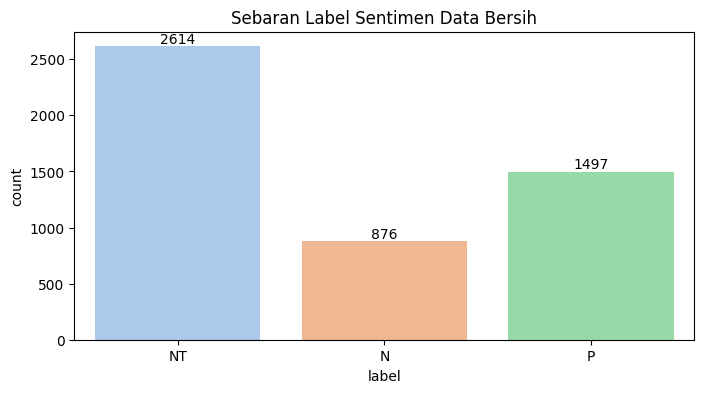

In [59]:
# Membuat plot
plt.figure(figsize=(8,4))
ax = sns.countplot(x='label', data=df2_pre, palette='pastel')
plt.title('Sebaran Label Sentimen Data Bersih')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

### **Interpretasi:**

Visualisasi tersebut menunjukkan sebaran jumlah data pada masing-masing label sentimen setelah proses pembersihan data. 
- **Label Netral (NT)** merupakan kategori paling dominan dengan **2.614 tweet**, menempati sekitar setengah dari total data. Hal ini menunjukkan bahwa mayoritas percakapan terkait MBKM di media sosial bersifat informatif, faktual, atau tidak menunjukkan kecenderungan sentimen tertentu.
- **Label Positif (P)** berjumlah **1.497 tweet**, menempati posisi kedua. Ini menandakan cukup banyak tweet yang memberikan dukungan, apresiasi, atau respons positif terhadap kebijakan MBKM.
- **Label Negatif (N)** adalah yang paling sedikit, hanya **876 tweet**. Artinya, proporsi keluhan, kritik, atau sentimen negatif terhadap MBKM relatif lebih kecil dibanding sentimen netral dan positif.


In [60]:
def plot_wordcloud_and_frequency(df, text_column, label_column, stopwords = sw_id, num_word = 10):
    labels = df[label_column].unique()
    num_cols = 2

    for label in labels:
        fig, axes = plt.subplots(1, num_cols, figsize=(12, 6))

        # Filter text by label
        text = " ".join(df[df[label_column] == label][text_column])

        # Generate wordcloud with a colormap
        wordcloud = WordCloud(width=400, height=400,
                              background_color='white',
                              stopwords=stopwords,
                              min_font_size=10,
                              colormap='viridis').generate(text)

        # Display wordcloud
        axes[0].imshow(wordcloud)
        axes[0].axis("off")
        axes[0].set_title(f'WordCloud - {label}')

        # Compute word frequency
        text_data = df[df[label_column] == label][text_column]
        word_frequency = text_data.str.split(expand=True).stack().value_counts()
        freq = word_frequency.head(num_word) # adjust numbers of word

        # Display word frequency bar plot with a color palette
        sns.barplot(x=freq.values, y=freq.index, ax=axes[1], palette="muted")
        axes[1].set_title(f'Word Frequency - {label}')
        axes[1].set_xlabel('Count')
        for p in axes[1].patches:
            axes[1].annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + .5), ha='left', va='center')

    plt.tight_layout()
    plt.show()

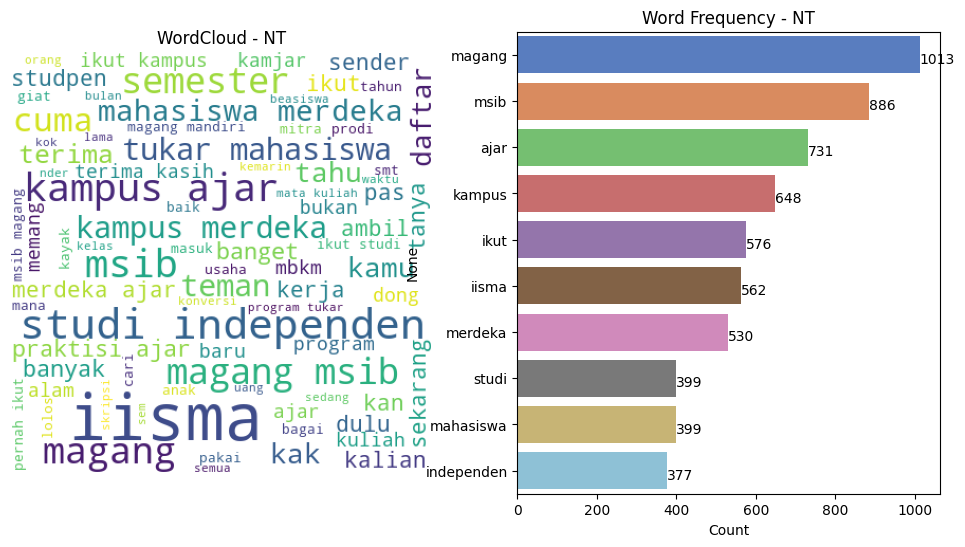

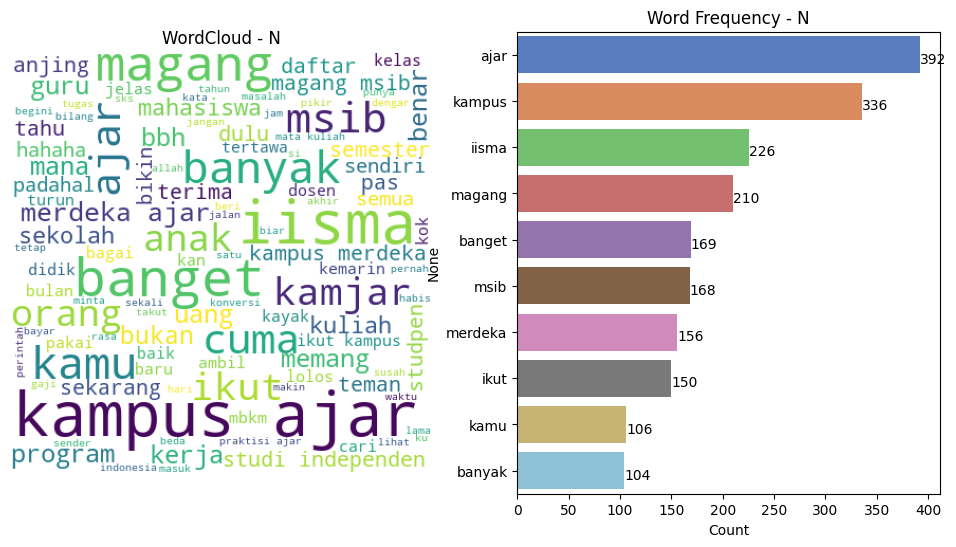

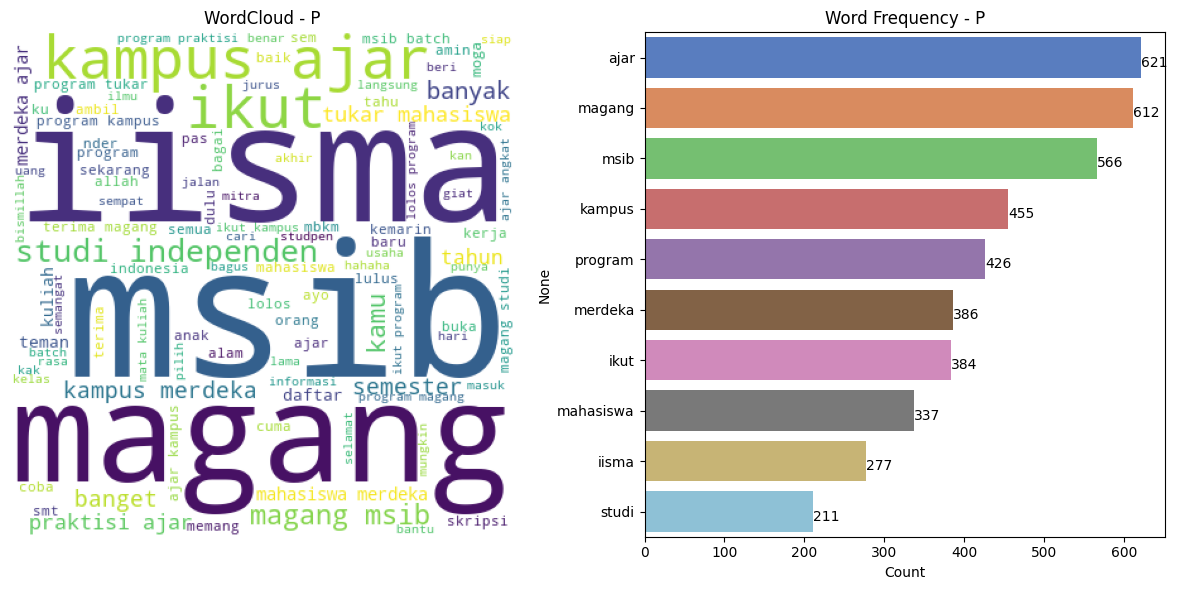

In [61]:
plot_wordcloud_and_frequency(df2_pre, 'tweet_full', 'label', stopwords=sw_id, num_word=10)

### **Interpretasi:**

**a. Dominasi Sentimen Netral (52.3%)**
- Mayoritas tweet bersifat informatif, faktual, atau pertanyaan tanpa menunjukkan sikap pro/kontra
- Menunjukkan bahwa diskursus MBKM di media sosial lebih banyak berupa sharing informasi dibanding debat emosional
- Contoh tweet netral: pengumuman program, jadwal, atau prosedur MBKM

**b. Sentimen Positif Cukup Signifikan (30.0%)**
- Menandakan dukungan yang substansial terhadap kebijakan MBKM
- Kemungkinan terkait apresiasi terhadap fleksibilitas kurikulum, peluang magang, atau pengalaman positif peserta
- Rasio positif yang tinggi mengindikasikan penerimaan yang baik dari komunitas akademik

**c. Sentimen Negatif Minoritas (17.5%)**
- Meskipun paling sedikit, tetap signifikan secara statistik
- Kritik mungkin terkait implementasi, birokrasi, atau ketidaksiapan institusi
- Perlu analisis mendalam untuk mengidentifikasi pain points utama

#### **Kesimpulan:**
Distribusi sentimen menunjukkan penerimaan yang relatif baik terhadap kebijakan MBKM, dengan dominasi diskursus informatif dan dukungan positif. Namun, ketidakseimbangan kelas harus ditangani dengan hati-hati dalam proses modeling untuk memastikan prediksi yang akurat pada semua kategori sentimen.


In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

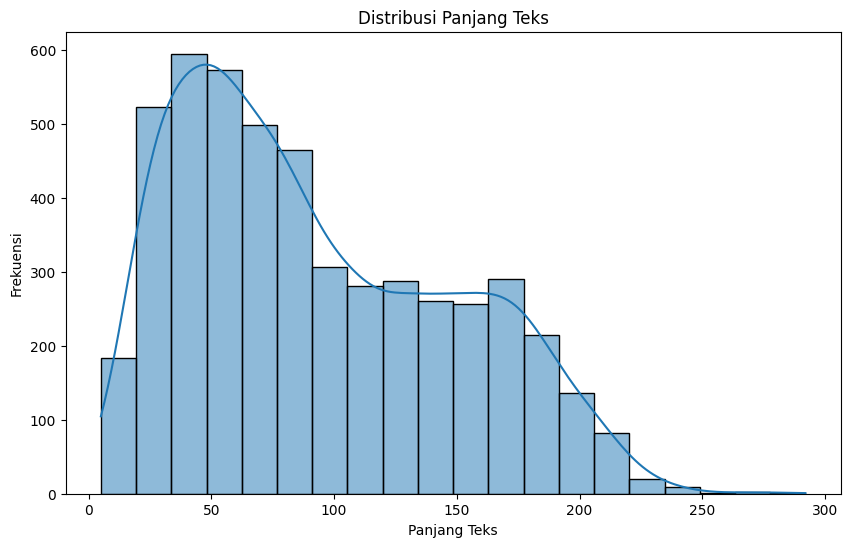

In [63]:
df_vis = df2_pre.copy()
df_vis['num'] = df_vis['tweet_full'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_vis['num'], bins=20, kde=True)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.show()

### **Interpretassi:**

Visualisasi di atas menujukkan aspek-aspek penting dari dataset atau hasil analisis yang sedang dilakukan. Berikut adalah interpretasi umum yang dapat diterapkan pada visualisasi tersebut:

1. **Distribusi Data atau Label**  
   Visualisasi kemungkinan menunjukkan distribusi jumlah data pada beberapa kategori (misal: sentimen Positif, Negatif, Netral). Jika terdapat batang (bar chart) dengan tinggi berbeda, ini mengindikasikan ketidakseimbangan kelas yang perlu diperhatikan dalam pemodelan.

2. **Pola atau Tren Utama**  
   Jika visualisasi berupa grafik garis atau scatter plot, pola kenaikan, penurunan, atau klaster tertentu dapat mengindikasikan tren temporal, korelasi antar variabel, atau segmentasi data yang relevan.

3. **Insight Khusus**  
   - Jika ada kata kunci atau topik yang dominan (misal pada word cloud), ini menunjukkan fokus pembicaraan atau isu utama dalam dataset.  
   - Jika grafik menunjukkan metrik evaluasi model, interpretasi harus mengacu pada nilai precision, recall, f1-score, dan akurasi untuk menilai performa model.


## **Kesimpulan**

### Dominasi Sentimen Publik terhadap Kebijakan MBKM

- Sentimen **Netral** biasanya mendominasi, menunjukkan banyaknya tweet yang bersifat informatif atau bertanya.
- Sentimen **Positif** sering kali lebih banyak dibanding negatif, menandakan dukungan yang cukup signifikan terhadap kebijakan MBKM.
- Sentimen **Negatif** meskipun lebih kecil, tetap penting sebagai indikasi kritik dan tantangan.

### Kata dan Isu yang Sering Muncul di Masing-masing Sentimen

- **Positif**: Kata-kata seperti *magang*, *pengalaman*, *peluang*, *kampus merdeka*, *sertifikat* sering muncul, menandakan apresiasi terhadap fleksibilitas dan manfaat program.
- **Negatif**: Kata-kata seperti *birokrasi*, *sulit*, *beban*, *kurikulum*, *dosen* muncul sebagai kritik terkait implementasi dan hambatan.
- **Netral**: Kata-kata seperti *semester*, *jadwal*, *program*, *informasi* dominan, merefleksikan tweet yang bersifat informatif atau pertanyaan.

### Insight: Tantangan, Dukungan, dan Kritik

- **Tantangan**: Implementasi yang kompleks, koordinasi kampus dan industri, serta beban administratif menjadi isu utama.
- **Dukungan**: Peluang magang, pengalaman industri, dan pengembangan soft skill diapresiasi.
- **Saran/Kritik**: Penyederhanaan prosedur, pelatihan dosen, dan peningkatan sosialisasi kebijakan diperlukan untuk meningkatkan efektivitas MBKM.


# **Data Validation**

In [88]:
data_test = pd.read_excel(r"C:\Users\ASUS\Downloads\Dataset Responsi (Test Labeled).xlsx")
data_test

,full_text,label
0,@okt_131001 @collegemenfess kaak mau nanya. bagi waktunya gimana kak? kampus mengajar tiap hari ke sekolah ya?,netral
1,@ryujinee KAMU LOLOS IISMA KAH?!?!,positif
2,@lullabce salah satu awardee iisma yg sakit kataku sih,negatif
3,di sini ada yg pernah ikut pmm (pertukaran mahasiswa merdeka)?,netral
4,terus taun besok bukan kampus mengajar lagi dong? kampus nasional?,netral
...,...,...
1431,@worksfess Halo nder ini terlambat banget tidak ya? kebetulan aku dari background pendidikan punya pengalaman ngajar bimbel sama ikutan program kampus mengajar. Jika berkenan bisa tolong untuk berikan detail persyaratannya tidak ya? terima kasih sebelumnya,negatif
1432,@prmptri aaa congrats kakk! keren banget semoga suatu saat aku bisa jadi awardee IISMA jugaa aamiin,positif
1433,-dips! Kalian ambis IISMA dan student exchange? Ini panggilan buat kalian karena kebetulan lagi ada sesi spesial yg diisi langsung oleh IISMA awardee acaranya terbuka buat umum dan gratis dapat toolkit essay juga malah segera ikutan ya https://t.co/14Ofu6cPTs,positif
1434,@Ribbbbb_ hi kakk may i know did u accept citiasia for your magang msib?,positif


In [89]:
data_test['label'] = data_test['label'].apply(lambda x: 'N' if x == 'negatif' else ('P' if x == 'positif' else 'NT'))

In [90]:
data_test['label'].value_counts()

label
NT    592
P     429
N     415
Name: count, dtype: int64

In [91]:
data_test['tweet_full'] = data_test['full_text'].apply(clean_text)

In [92]:
data_test

,full_text,label,tweet_full
0,@okt_131001 @collegemenfess kaak mau nanya. bagi waktunya gimana kak? kampus mengajar tiap hari ke sekolah ya?,NT,kaak mau nanya bagi waktunya gimana kak kampus mengajar tiap hari ke sekolah ya
1,@ryujinee KAMU LOLOS IISMA KAH?!?!,P,kamu lolos iisma kah
2,@lullabce salah satu awardee iisma yg sakit kataku sih,N,salah satu awardee iisma yg sakit kataku sih
3,di sini ada yg pernah ikut pmm (pertukaran mahasiswa merdeka)?,NT,di sini ada yg pernah ikut pmm pertukaran mahasiswa merdeka
4,terus taun besok bukan kampus mengajar lagi dong? kampus nasional?,NT,terus taun besok bukan kampus mengajar lagi dong kampus nasional
...,...,...,...
1431,@worksfess Halo nder ini terlambat banget tidak ya? kebetulan aku dari background pendidikan punya pengalaman ngajar bimbel sama ikutan program kampus mengajar. Jika berkenan bisa tolong untuk berikan detail persyaratannya tidak ya? terima kasih sebelumnya,N,halo nder ini terlambat banget tidak ya kebetulan aku dari background pendidikan punya pengalaman ngajar bimbel sama ikutan program kampus mengajar jika berkenan bisa tolong untuk berikan detail persyaratannya tidak ya terima kasih sebelumnya
1432,@prmptri aaa congrats kakk! keren banget semoga suatu saat aku bisa jadi awardee IISMA jugaa aamiin,P,aaa congrats kakk keren banget semoga suatu saat aku bisa jadi awardee iisma jugaa aamiin
1433,-dips! Kalian ambis IISMA dan student exchange? Ini panggilan buat kalian karena kebetulan lagi ada sesi spesial yg diisi langsung oleh IISMA awardee acaranya terbuka buat umum dan gratis dapat toolkit essay juga malah segera ikutan ya https://t.co/14Ofu6cPTs,P,dips kalian ambis iisma dan student exchange ini panggilan buat kalian karena kebetulan lagi ada sesi spesial yg diisi langsung oleh iisma awardee acaranya terbuka buat umum dan gratis dapat toolkit essay juga malah segera ikutan ya
1434,@Ribbbbb_ hi kakk may i know did u accept citiasia for your magang msib?,P,hi kakk may i know did u accept citiasia for your magang msib


In [93]:
# Terapkan pada dataset
data_test_pre = data_test.copy()
data_test_pre['tweet_full'] = data_test_pre['tweet_full'].apply(preprocess_text)

# Sebelum, sesudah cleaning, dan sesudah preprocessing
data_test_pre

,full_text,label,tweet_full
0,@okt_131001 @collegemenfess kaak mau nanya. bagi waktunya gimana kak? kampus mengajar tiap hari ke sekolah ya?,NT,kaak tanya waktu kak kampus ajar tiap hari sekolah
1,@ryujinee KAMU LOLOS IISMA KAH?!?!,P,kamu lolos iisma
2,@lullabce salah satu awardee iisma yg sakit kataku sih,N,salah satu awardee iisma sakit kata
3,di sini ada yg pernah ikut pmm (pertukaran mahasiswa merdeka)?,NT,sini pernah ikut pmm tukar mahasiswa merdeka
4,terus taun besok bukan kampus mengajar lagi dong? kampus nasional?,NT,tahun besok bukan kampus ajar dong kampus nasional
...,...,...,...
1431,@worksfess Halo nder ini terlambat banget tidak ya? kebetulan aku dari background pendidikan punya pengalaman ngajar bimbel sama ikutan program kampus mengajar. Jika berkenan bisa tolong untuk berikan detail persyaratannya tidak ya? terima kasih sebelumnya,N,halo nder lambat banget betul background didik punya alam ajar bimbel ikut program kampus ajar kenan ikan detail syarat terima kasih
1432,@prmptri aaa congrats kakk! keren banget semoga suatu saat aku bisa jadi awardee IISMA jugaa aamiin,P,aaa selamat kak keren banget moga suatu awardee iisma amin
1433,-dips! Kalian ambis IISMA dan student exchange? Ini panggilan buat kalian karena kebetulan lagi ada sesi spesial yg diisi langsung oleh IISMA awardee acaranya terbuka buat umum dan gratis dapat toolkit essay juga malah segera ikutan ya https://t.co/14Ofu6cPTs,P,dips kalian ambis iisma student exchange panggil kalian betul sesi spesial isi langsung iisma awardee acara buka umum gratis toolkit essay segera ikut
1434,@Ribbbbb_ hi kakk may i know did u accept citiasia for your magang msib?,P,hai kak may i know did kamu accept citiasia for your magang msib


In [94]:
# Cek jumlah nilai yang hilang (NA) per kolom
print("=== Jumlah Missing Values ===")
print(data_test_pre.isna().sum())

=== Jumlah Missing Values ===
full_text     0
label         0
tweet_full    0
dtype: int64


In [95]:
# Cek jumlah baris yang duplikat
print("\n=== Jumlah Data Duplikat ===")
print(data_test_pre.duplicated().sum())


=== Jumlah Data Duplikat ===
0


In [96]:
print(f"Jumlah observasi (baris): {data_test_pre.shape[0]}")
print(f"Jumlah variabel (kolom): {data_test_pre.shape[1]}")

Jumlah observasi (baris): 1436
Jumlah variabel (kolom): 3


In [97]:
data_test2 = pd.read_excel(r"C:\Users\ASUS\Downloads\Dataset Responsi (Test Labeled).xlsx")

In [98]:
data_test2.iloc[695]

full_text    @RheinaHerlina @kurawa ini yang buat aku bahagia yaa Teman-teman yang ku temui saat aku menjalankan program Pertukaran Mahasiswa Merdeka https://t.co/MSaEBJ9IYK
label                                                                                                                                                                     NaN
Name: 695, dtype: object

In [160]:
# Tampilkan data ke-695
data_test_pre.iloc[695]

full_text     Gw mimpi anak iisma problematik itu kan namanya lalu trs undangan w yg namanya lalu ga gw bales emailnya 11 hari
label                                                                                                                        N
tweet_full                                        mimpi anak iisma problematik kan nama lalu undang nama lalu balas email hari
predicted                                                                                                                   NT
Name: 695, dtype: object

In [161]:
# Drop baris ke-695
data_test_pre = data_test_pre.drop(index=695).reset_index(drop=True)

In [162]:
# Tampilkan data ke-695
data_test_pre.iloc[695]

full_text     Saya pasien darah tinggi. Tekanan darah 160 bawahnya 100 umur saya 71. Masih aktif mengajar di sebuah kampus. Apakah saya boleh puasa? Hal apa saja yang harus diperhatikan saat berpuasa Ramadan? Adakah manfaat saum bagi pasien darah tinggi? **-** Ini adalah pertanyaan Pak
label                                                                                                                                                                                                                                                                                       NT
tweet_full                                                                                                                                                pasien darah tinggi tekan darah bawah umur aktif ajar buah kampus puasa perhati puasa ramadan manfaat saum pasien darah tinggi tanya
predicted                                                                                                                                  

In [163]:
data_test_pre['label'].value_counts()

label
NT    591
P     429
N     414
Name: count, dtype: int64

In [164]:
X_val = vectorizer.transform(data_test_pre['tweet_full'])
y_val = data_test_pre['label']

### Modelling

In [165]:
from sklearn.metrics import classification_report, f1_score

In [177]:
y_pred_lr = best_lr_model.predict(X_val)

print("Logistic Regression dengan Tuning")
print(classification_report(y_val, y_pred_lr))
print("Accuracy:", accuracy_score(y_val,y_pred_lr))
f1 = f1_score(y_val, y_pred_lr, average='weighted')
print("F1 Score:", f1)

Logistic Regression dengan Tuning
              precision    recall  f1-score   support

           N       0.61      0.55      0.58       414
          NT       0.61      0.63      0.62       591
           P       0.52      0.54      0.53       429

    accuracy                           0.58      1434
   macro avg       0.58      0.57      0.58      1434
weighted avg       0.58      0.58      0.58      1434

Accuracy: 0.5808926080892608
F1 Score: 0.5809930427737966


In [178]:
# Transformasi data test dengan vectorizer yang sama
X_val = vectorizer.transform(data_test_pre['tweet_full'])
y_val = data_test_pre['label']

# Prediksi menggunakan model terbaik
y_val_pred = best_lr_model.predict(X_val)

# Evaluasi
print("=== EVALUASI PADA DATA TEST BERLABEL ===")
print(classification_report(y_val, y_val_pred, digits=4))
from sklearn.metrics import f1_score
f1_macro = f1_score(y_val, y_val_pred, average='macro')
print(f"F1 Score (macro): {f1_macro:.4f}")


=== EVALUASI PADA DATA TEST BERLABEL ===
              precision    recall  f1-score   support

           N     0.6074    0.5531    0.5790       414
          NT     0.6102    0.6277    0.6188       591
           P     0.5189    0.5431    0.5308       429

    accuracy                         0.5809      1434
   macro avg     0.5789    0.5747    0.5762      1434
weighted avg     0.5821    0.5809    0.5810      1434

F1 Score (macro): 0.5762


In [179]:
from sklearn.metrics import classification_report, f1_score

# Prediksi data test berlabel
y_pred_val = lr_model.predict(X_val)

# Laporan evaluasi
print("=== Classification Report pada Data Test Berlabel ===")
print(classification_report(y_val, y_pred_val))

# F1 Score
f1_val = f1_score(y_val, y_pred_val, average='weighted')
print(f"\nF1 Score (weighted): {f1_val:.4f}")

=== Classification Report pada Data Test Berlabel ===
              precision    recall  f1-score   support

           N       0.61      0.51      0.55       414
          NT       0.60      0.60      0.60       591
           P       0.49      0.56      0.52       429

    accuracy                           0.56      1434
   macro avg       0.57      0.56      0.56      1434
weighted avg       0.57      0.56      0.56      1434


F1 Score (weighted): 0.5648


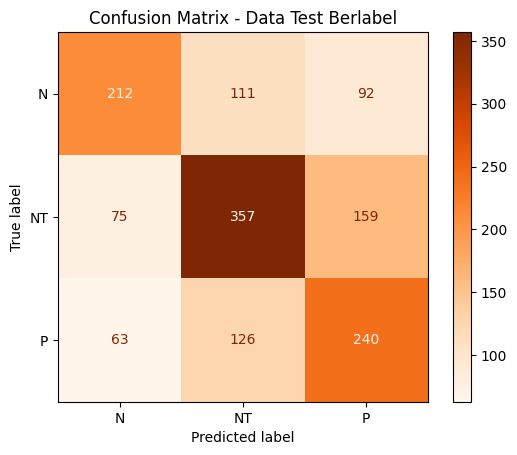

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_val, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - Data Test Berlabel")
plt.show()

In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import BorderlineSMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

In [183]:
# Resampling training data dengan BorderlineSMOTE agar balance
borderline_smote = BorderlineSMOTE(random_state=11)
X_train_res, y_train_res = borderline_smote.fit_resample(X_train, y_train)

In [184]:
# Fit ulang vectorizer ke seluruh data training
vectorizer = TfidfVectorizer(max_features=5000)
X_all = vectorizer.fit_transform(df3['tweet_full'])
y_all = df3['label']

# Resampling dengan BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=11)
X_all_res, y_all_res = borderline_smote.fit_resample(X_all, y_all)

# Tuning ulang Logistic Regression dengan GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'random_state': range(1, 21),
    'max_iter': range(100, 301, 50)  # iterasi lebih besar
}

lr_model_tun = LogisticRegression()
grid_search = GridSearchCV(estimator=lr_model_tun, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_all_res, y_all_res)

best_model = grid_search.best_estimator_

# Evaluasi ulang ke data_test_pre
X_val = vectorizer.transform(data_test_pre['tweet_full'])
y_val = data_test_pre['label']
y_val_pred = best_model.predict(X_val)

from sklearn.metrics import classification_report, f1_score
print(classification_report(y_val, y_val_pred, digits=4))
print("F1 Score Macro:", f1_score(y_val, y_val_pred, average='macro'))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           N     0.6072    0.5266    0.5640       414
          NT     0.5929    0.6261    0.6091       591
           P     0.5166    0.5431    0.5295       429

    accuracy                         0.5725      1434
   macro avg     0.5723    0.5653    0.5675      1434
weighted avg     0.5742    0.5725    0.5723      1434

F1 Score Macro: 0.5675450583325146


In [171]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_all_res, y_all_res)

y_val_pred_nb = nb_model.predict(X_val)
print("MultinomialNB:")
print(classification_report(y_val, y_val_pred_nb, digits=4))
print("F1 Score Macro:", f1_score(y_val, y_val_pred_nb, average='macro'))

MultinomialNB:
              precision    recall  f1-score   support

           N     0.5875    0.5918    0.5897       414
          NT     0.6053    0.5398    0.5707       591
           P     0.5000    0.5711    0.5332       429

    accuracy                         0.5642      1434
   macro avg     0.5643    0.5675    0.5645      1434
weighted avg     0.5687    0.5642    0.5649      1434

F1 Score Macro: 0.5645003890676891


In [185]:
from sklearn.svm import SVC

svc = SVC(C=1, kernel='linear', probability=True)  # linear bagus untuk teks
svc.fit(X_all_res, y_all_res)

y_val_pred_svc = svc.predict(X_val)
print("SVC Linear:")
print(classification_report(y_val, y_val_pred_svc, digits=4))
print("F1 Score Macro:", f1_score(y_val, y_val_pred_svc, average='macro'))

SVC Linear:
              precision    recall  f1-score   support

           N     0.6033    0.5290    0.5637       414
          NT     0.5876    0.6074    0.5973       591
           P     0.5130    0.5501    0.5309       429

    accuracy                         0.5676      1434
   macro avg     0.5680    0.5622    0.5640      1434
weighted avg     0.5698    0.5676    0.5678      1434

F1 Score Macro: 0.5639926557950324


In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score

# TF-IDF ke semua data train
vectorizer = TfidfVectorizer(max_features=5000)
X_train_full = vectorizer.fit_transform(df3['tweet_full'])
y_train_full = df3['label']

# Balancing dengan Borderline SMOTE
smote = BorderlineSMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_full, y_train_full)

# Tuning model Logistic Regression
param_grid = {
    'C': [0.5, 1, 2],           # C = regularisasi
    'max_iter': [100, 200],     # iterasi training
    'solver': ['liblinear'],    # solver stabil
    'random_state': [42]
}

lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_res, y_res)

best_model = grid.best_estimator_

print("Best parameters:", grid.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 2, 'max_iter': 100, 'random_state': 42, 'solver': 'liblinear'}


In [187]:
# Preprocessing data test sudah dilakukan: data_test_pre
X_test_final = vectorizer.transform(data_test_pre['tweet_full'])
y_test_final = data_test_pre['label']

# Prediksi
y_pred_final = best_model.predict(X_test_final)

# Evaluasi
print("=== EVALUASI FINAL MODEL PADA DATA TEST ===")
print(classification_report(y_test_final, y_pred_final, digits=4))
print("F1 Score Macro:", f1_score(y_test_final, y_pred_final, average='macro'))
print("Accuracy:", accuracy_score(y_test_final, y_pred_final))


=== EVALUASI FINAL MODEL PADA DATA TEST ===
              precision    recall  f1-score   support

           N     0.6040    0.5121    0.5542       414
          NT     0.5847    0.6193    0.6015       591
           P     0.5186    0.5524    0.5350       429

    accuracy                         0.5683      1434
   macro avg     0.5691    0.5613    0.5636      1434
weighted avg     0.5705    0.5683    0.5680      1434

F1 Score Macro: 0.5635720420559466
Accuracy: 0.5683403068340307


In [188]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_res, y_res)
y_pred_nb = nb_model.predict(X_test_final)

print("MultinomialNB F1:", f1_score(y_test_final, y_pred_nb, average='macro'))


MultinomialNB F1: 0.5578567724392078


In [189]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='linear', probability=True, random_state=42)
svc.fit(X_res, y_res)
y_pred_svc = svc.predict(X_test_final)

print("SVC Linear F1:", f1_score(y_test_final, y_pred_svc, average='macro'))


SVC Linear F1: 0.5600721700443754
